# Exercise: Continuous time models
## Yoav Ram


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numba
import scipy.stats
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set_context('notebook')
red, blue, green, purple, orange, yellow = sns.color_palette('Set1', 6)

# Background

The following is a deterministic implementation of [predator-prey model](../sessions/predator-prey.ipynb):

In [4]:
def dxydt(t, xy, b, h, ϵ, d):
    x, y = xy
    dx = b * x - h * x * y
    dy = ϵ * h * x * y - d * y
    return np.array([dx, dy])

In [5]:
b = 1
h = 0.005
ϵ = 0.8
d = 0.6

steps = 50000
XY = np.empty((2, steps))
XY[:,0] = 50, 100
dt = 0.001

for t_ in range(1, steps):
    XY[:,t_] = XY[:, t_-1] + dxydt(t_, XY[:, t_-1], b, h, ϵ, d) * dt
X, Y = XY
T = np.arange(0, steps*dt, dt)

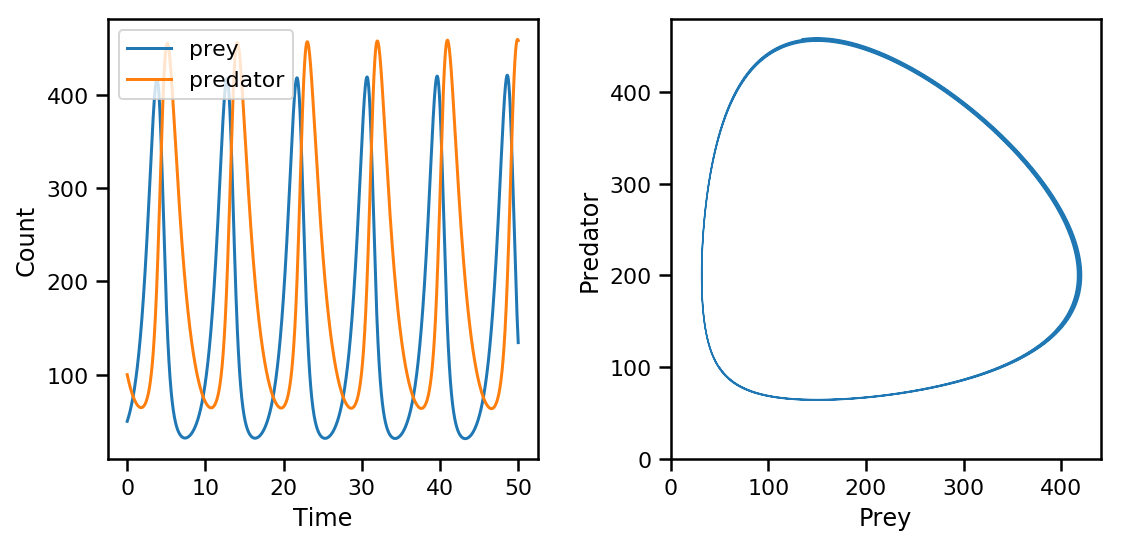

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes[0]
ax.plot(T, X, label='prey')
ax.plot(T, Y, label='predator')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend();

ax = axes[1]
ax.plot(X, Y, lw=0.5)
ax.set_xlabel('Prey')
ax.set_ylabel('Predator')
ax.set(xlim=(0, None), ylim=(0, None))

fig.tight_layout()

We talked about how these cycles only *seem* stable, but really, they are prone to extinctions due to stochastic events, leading to either exitinction of both species or extinction of the predator and explosion of the prey population.

In this assignment you will implement a stochastic simulation of the dynamics using Gillespie's algorithm.

# Ex 1 - Gillespie algorithm

**Write a Gillespie simulation for the predator-prey dynamics.**

**Run a single simulation and plot it together with the deterministic dynamics.**

Plot both prey and predator population sizes vs time, as well as a phase plot of the predator vs prey.

Note 1: once the predators are extinct there is no more use to continue running the simulation as the prey will just grow exponentiallt according to $dx/dt = bx$.

Note 2: since this is a stochastic simulation, your results may differ from mine.

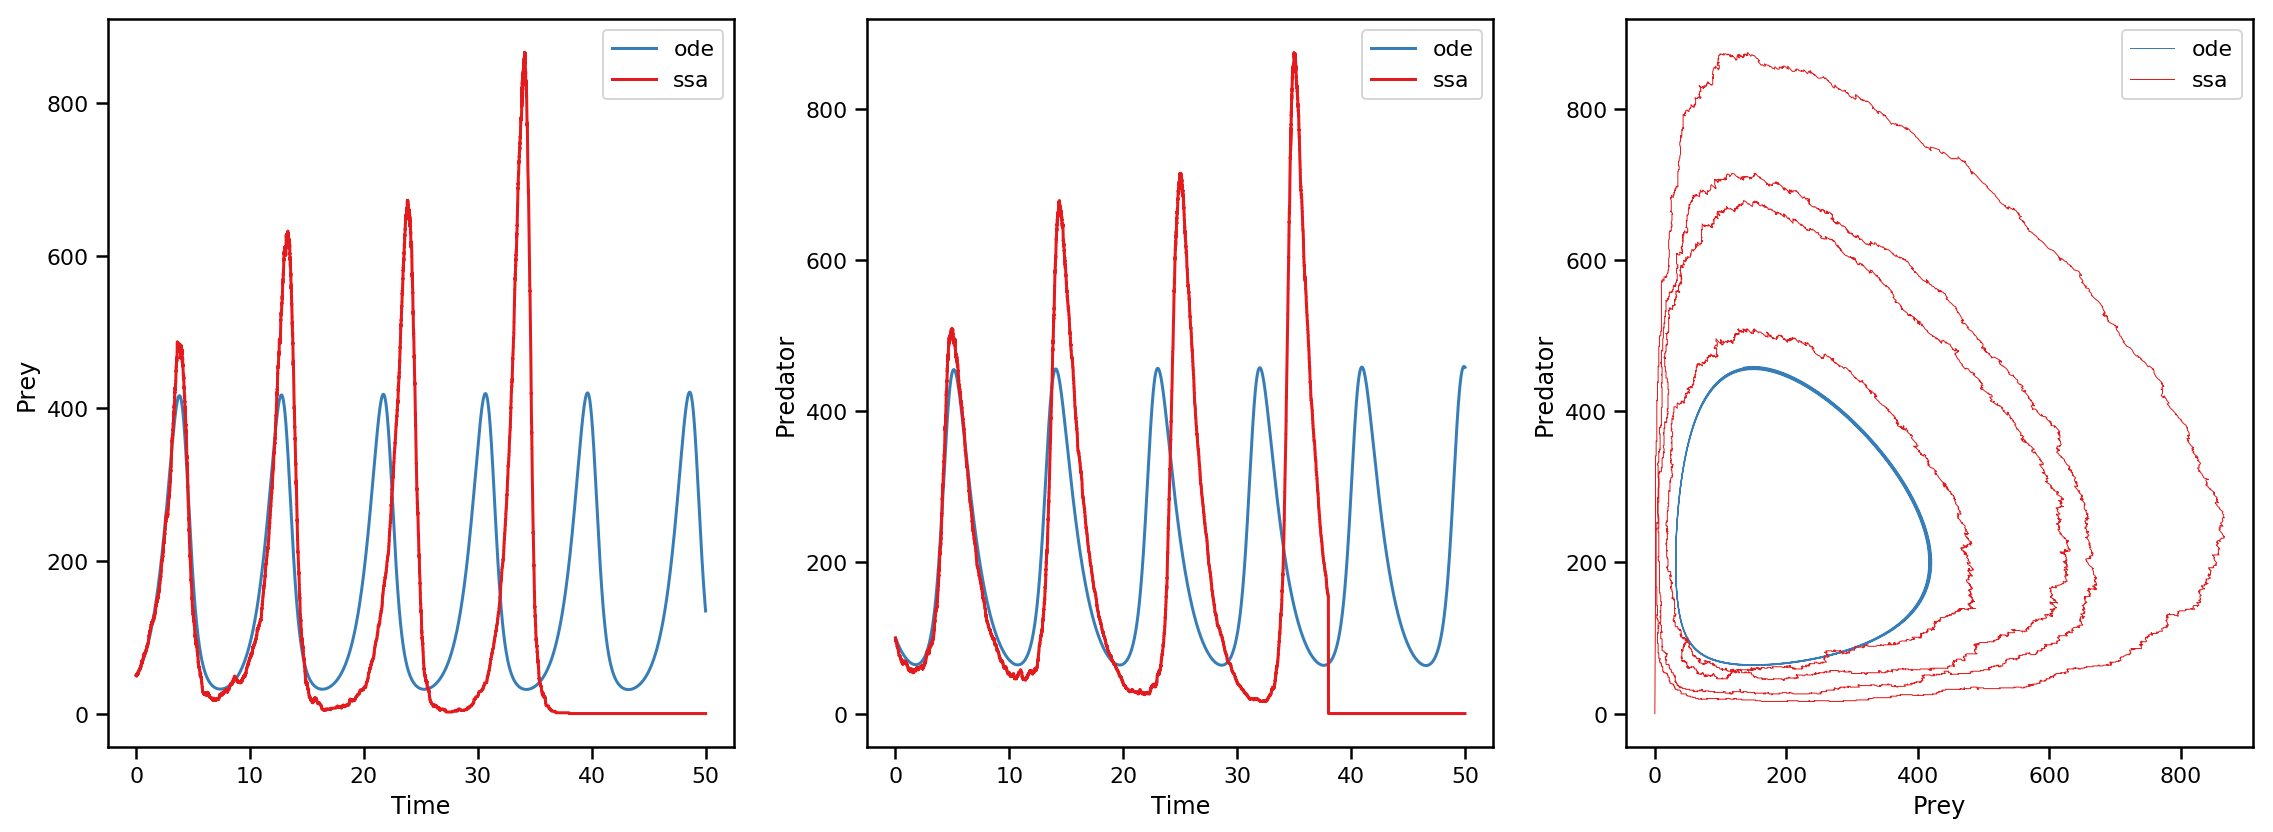

# Ex 2 - Extinction probability

**Calculate the extinction probability of the predators in the first 50 days (assuming `t` is in days) and plot it as a function of $h$ the hunting probability.**

The extinction probability is the probability that the predators populations size reaches zero.
To do that, you will have to run many simulations for the same parameters and check what is the fraction that finished with zero predators.

Think: How many replications should you use per parameter set?
Remember that the standard error of the mean generally decreases like the root of the number of observations ($\sqrt{n}$).

When choosing the number of $h$ values, think if you want to use `np.linspace` or `np.logspace`, or maybe draw random values (from which distribution?) and how many points you should use.

Note that this exercise will require running many simulations; if we estimate the probability from just 100 simulations, and plot against just 10 values of $h$, we still need to run 1000 simulations.

There are several ways to attack this, and they are not mutually exclusive:
1. optimize the simulation code
1. run in parallel on multiple cores on your own machine.

At any case, make sure to save your simulation results to files so that you can reload them again and change the analysis or plot the figure again.

# Ex 3 - ABC

Here's data from a real predator-prey system -- the hare and lynx system:

In [3]:
data = np.fromstring("""0 20 10 
2 55 15 
4 65 55 
6 95 60 
8 55 20 
10 5 15 
12 15 10 
14 50 60 
16 75 60 
18 20 10 
20 25 5 
22 50 25 
24 70 40 
26 30 25 
28 15 5 
""", sep=' ', dtype=int)
data = data.reshape(-1, 3)
data[:, 1] *= 1000
data[:, 2] *= 100
print(data)

[[    0 20000  1000]
 [    2 55000  1500]
 [    4 65000  5500]
 [    6 95000  6000]
 [    8 55000  2000]
 [   10  5000  1500]
 [   12 15000  1000]
 [   14 50000  6000]
 [   16 75000  6000]
 [   18 20000  1000]
 [   20 25000   500]
 [   22 50000  2500]
 [   24 70000  4000]
 [   26 30000  2500]
 [   28 15000   500]]


The first column is years, the second is hare population size, the third is lynx population size.

Here is a plot the data.

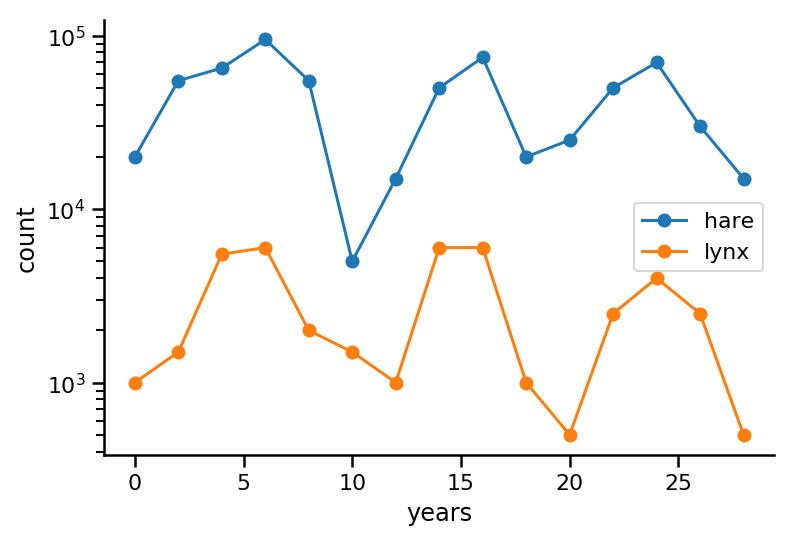

In [16]:
t, hare, lynx = data.T

plt.plot(t, hare, '-o', label='hare')
plt.plot(t, lynx, '-o', label='lynx')
plt.yscale('log')
plt.xlabel('years')
plt.ylabel('count')
plt.legend()

sns.despine()

We can see the cycles that we discussed in lecture 10.

**Now use ABC to fit a model to the data**, just as we did in lecture 11.

Do not use summary statistics, rather, calculate the MSE (mean squared error) between the data and the simulations.
The `ABCSMC` constructor's third argument is a distance function that accepts the simulation dict as a first argument and the real dict as a second argument (the real dict is the one you give to the `new` method later on). See [example](https://pyabc.readthedocs.io/en/latest/examples/parameter_inference.html).

**Tips**
- for `b` and `d` choose an `expon(1)` prior distribution
- for `h` and `ϵ` choose `uniform(0, 1)` prior distribution
- if you get division by zero errors, the population has probably gone extinct, you should make sure you stop the simulation when the population is extinct
- running time may vary, but will take at least several minutes

In [17]:
from pyabc import ABCSMC, RV, Distribution
from pyabc.visualization import plot_kde_1d, plot_kde_2d

In [53]:
def model(params):
    # run a single simulation
    
    return dict( ###
        # set the return values inside a dict
    ) ###

prior = Distribution( ###
    # set the parameter prior distributions here
) ###

def mse(x, y): ###
    # compute the distance between data and simulation (distance is symmetric so it doesn't matter which is x and which is y)

# create the ABC object and init it with the new method

INFO:History:Start <ABCSMC(id=1, start_time=2018-12-20 16:30:41.648648, end_time=None)>
INFO:Epsilon:initial epsilon is 2499483017.733333


In [54]:
%%time ###
minimum_epsilon = # set value here
max_nr_populations = # set value here
history = abc.run(minimum_epsilon=minimum_epsilon, max_nr_populations=max_nr_populations)

INFO:ABC:t:0 eps:2499483017.733333
INFO:ABC:t:1 eps:2494616293.9333334
INFO:History:Done <ABCSMC(id=1, start_time=2018-12-20 16:30:41.648648, end_time=2018-12-20 16:36:39.660795)>


CPU times: user 440 ms, sys: 71.8 ms, total: 512 ms
Wall time: 5min 32s


We now plot the approximated posterior distributions of the model parameters.

In [ ]:
params, weights = history.get_distribution(0)
params.head()

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for param_name, ax in zip(params.columns, axes.flat):
    sns.distplot(params[param_name], hist_kws=dict(weights=weights), ax=ax)
    ax.axvline(params[param_name].values @ weights, color=red, ls='--')
    ax.set(xlabel=param_name, ylabel='Posterior')

fig.tight_layout()

**end of assignment**